### Explanatory figure (fig 5)
Combining individual fit, windowed average, first level GLM results, design matrix and group stats

Start by loading all the subject 0 results

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

windowed_csv = pd.read_csv('fsl_mrs_fmrs_demo/windowed_avg_results/sub0_stim_wavg.csv', index_col=0)
indept_csv = pd.read_csv('fsl_mrs_fmrs_demo/windowed_avg_results/sub0_stim.csv', index_col=0)
glm_csv = pd.read_csv('fsl_mrs_fmrs_demo/first_level_results/sub0/stim/free_parameters.csv', index_col=0)

design_mat = pd.read_csv('fsl_mrs_fmrs_demo/designmat.csv', header=None)

Create the glutamate trace.

In [32]:
glu_betas = glm_csv.filter(axis=0, regex='conc_Glu').loc[:,'mean']
# glu_betas
ss_glu_trace = design_mat @ glu_betas.to_numpy()

Nicely format the group results

In [106]:
import pandas as pd
# Load the results
cmd_line_df = pd.read_csv('fsl_mrs_fmrs_demo/group_results/group_stats.csv',index_col=0, header=[0,1])
cmd_line_df = cmd_line_df.filter(regex='mean_activation', axis=0)\

cmd_line_df.index = cmd_line_df.index.str.replace('_mean_activation','')
cmd_line_df.index = cmd_line_df.index.str.replace('conc_','')

metab_to_retain = ['Asp', 'Glc', 'Lac','Glu', 'NAA+NAAG', 'Cr+PCr', 'PCh+GPC']

idx = pd.IndexSlice
cmd_line_df = cmd_line_df.loc[metab_to_retain, idx[['z', 'p'],:] ]

# Format for display
df_styled = cmd_line_df\
.style\
.format(formatter={('z', 'STIM>CTRL'):    "{:+05.2f}", ('z', 'CTRL>STIM'):    "{:+05.2f}",
                   ('p', 'STIM>CTRL'):    "{:05.3f}", ('p', 'CTRL>STIM'):    "{:05.3f}"})\
.highlight_between(subset=['p'],left=0, right=0.05, props='font-weight:bold;color:#e83e8c')

import dataframe_image as dfi
df_styled.export_png('group_results_styled.png')

/Users/wclarke/miniconda3/envs/fsl_mrs/lib/python3.8/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
objc[63343]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa525c23f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/109.0.5414.119/Libraries/libGLESv2.dylib (0x118415880). One of the two will be used. Which one is undefined.
[0220/102532.897605:INFO:headless_shell.cc(223)] 100312 bytes written to file /var/folders/nn/v2nq0rss0yz3zzf069f84hxw0000gt/T/tmpa314df02/temp.png


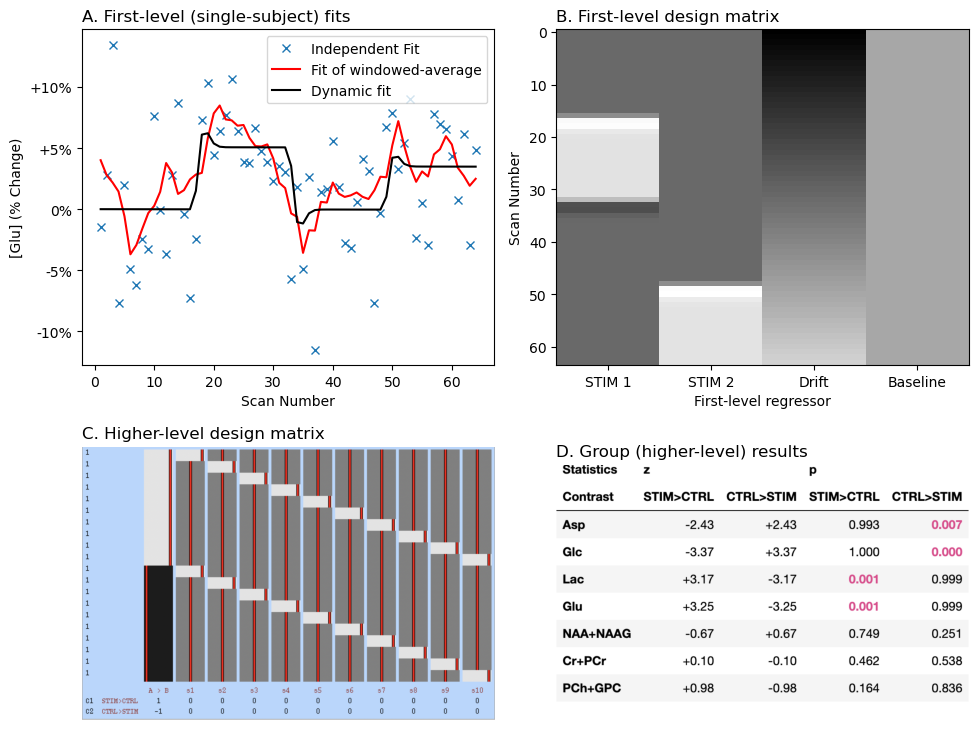

In [138]:
from nilearn.plotting import plot_design_matrix

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

norm_value = np.mean(indept_csv.Glu[0:16])
axes[0][0].plot(np.arange(1,65), indept_csv.Glu/norm_value, 'x', label='Independent Fit')
axes[0][0].plot(np.arange(1,65), windowed_csv.Glu/norm_value, 'r', label='Fit of windowed-average')
axes[0][0].plot(np.arange(1,65), ss_glu_trace/ss_glu_trace[0], 'k', label='Dynamic fit')
axes[0][0].legend()
axes[0][0].set_xlabel('Scan Number')
axes[0][0].set_ylabel('[Glu] (% Change)')
axes[0][0].set_yticks([0.9, 0.95, 1.0, 1.05, 1.1])
axes[0][0].set_yticklabels(['-10%', '-5%', '0%', '+5%', '+10%'])

plt.set_cmap('binary_r')
plot_design_matrix(design_mat, ax=axes[0][1])
axes[0][1].set_ylabel('Scan Number')
axes[0][1].xaxis.tick_bottom()
axes[0][1].set_xticklabels(['STIM 1', 'STIM 2', 'Drift', 'Baseline'], rotation = 0, ha="center")
axes[0][1].set_xlabel('First-level regressor')

image = plt.imread('group_design.png')
axes[1][0].imshow(image)
axes[1][0].axis('off')

image2 = plt.imread('group_results_styled.png')
axes[1][1].imshow(image2)
axes[1][1].axis('off')

axes[0][0].set_title('A. First-level (single-subject) fits', loc='Left')
axes[0][1].set_title('B. First-level design matrix', loc='Left')
axes[1][0].set_title('C. Higher-level design matrix', loc='Left')
axes[1][1].set_title('D. Group (higher-level) results', loc='Left')
fig.subplots_adjust(hspace=0.15)

# plt.show()
plt.savefig('../../publication/figures/fig5_fmrs_demo.png', dpi=400, bbox_inches='tight', transparent=True)
